In [1]:
text = ''
with open('data/merged_punct_tokenize.csv', encoding='utf-8') as f:
    text = f.read()

In [6]:
import pymorphy2 as pm

In [7]:
morph = pm.MorphAnalyzer()

In [31]:
all_words = text.replace('\n', '').split('_')

In [34]:
words = list(set(all_words))

In [50]:
%%time
gramems = [morph.parse(word)[0] for word in words]

Wall time: 24min 28s


In [128]:
tags = set([str(g.tag).split(' ')[0] for g in gramems])
tags_count = dict()
for g in gramems:
    tag = str(g.tag).split(' ')[0]
    if str(g.tag).split(' ')[0] in tags_count.keys():
        tags_count[tag] += 1
    else:
        tags_count[tag] = 1

In [97]:
for count, tag in sorted([(b, a) for (a, b) in list(tags_count.items())]):
    print(tag, count)d

ADVB,Infr 1
INFN,impf,intr,Infr 1
NOUN,inan,GNdr,Pltm,Fixd,Abbr 1
NOUN,inan,femn,Geox 1
NOUN,inan,masc,Fixd,Sgtm 1
NOUN,inan,masc,Sgtm,Fixd,Abbr,Orgn 1
PRTF,impf,tran,past,pssv,Arch 1
PRTF,perf,tran,past,actv,Arch 1
PRTS,impf,past,pssv,Arch 1
PRTS,impf,past,pssv,Infr 1
ADJF,Anum,Infr 2
CONJ,Prnt,Abbr 2
INFN,perf,tran,Arch 2
INTJ,Slng 2
NOUN,anim,femn,Ms-f,Sgtm,Name 2
NOUN,anim,femn,Sgtm,Infr 2
NOUN,anim,masc,Ms-f 2
NOUN,anim,neut,Fixd 2
NOUN,inan,femn,Arch 2
NOUN,inan,femn,Fixd,Pltm 2
NOUN,inan,masc,Arch 2
NOUN,inan,neut,Sgtm,Fixd,Abbr,Orgn 2
NUMR,Arch 2
PREP,Infr 2
PRTF,impf,intr,pres,actv,Infr 2
PRTS,perf,past,pssv,Arch 2
ADJF,Apro,Subx,Anph,Dist 3
GRND,perf,tran,Arch 3
INFN,impf,intr,Arch 3
NOUN,inan,femn,Sgtm,Erro 3
NOUN,inan,masc,Infr 3
NPRO,neut,3per,Anph 3
NOUN,inan,GNdr,Pltm,Orgn 4
NOUN,inan,femn,Sgtm,Fixd,Abbr,Orgn 4
NOUN,inan,femn,Slng 4
NOUN,inan,masc,Sgtm,Arch 4
ADJF,Fixd 5
INFN,impf,intr,Impx 5
NOUN,inan,femn,Orgn 5
NOUN,inan,femn,Sgtm,Fixd,Abbr,Geox 5
PRTF,perf,tran,past,

In [105]:
[word for word in words if (word[0] == '<' and word[-1] == '>')]

['<.><...>',
 '<?..><@>',
 '<!>Прим<@>',
 '<!..><—>',
 '<?><@><@>',
 '<.>Вежливость <—>',
 '<.>Принес<@>',
 '<.>Часть<@>',
 '<.><@> <—>',
 '<?><—>',
 '<@>',
 '<...>Глава<@>',
 '<.>Этакое<@>',
 '<.>Й<@>',
 '<!><@>',
 '<...><@>',
 '<:>',
 '<.>Ээй <—>',
 '<.>МАЛЬЧИКИ<@>',
 '<?..><—>',
 '<?>Шу<@>',
 '<.>Входит<@>',
 '<.>Вам <—>',
 '<.>ВечерВечерВечер<@>',
 '<.>Сказать<@>',
 '<?><@>',
 '<.>Г<@>',
 '<.>Спасибо <—>',
 '<.>Парень <—>',
 '<:> <—><@>',
 '<.>Синода<@>',
 '<.>Части<@>',
 '<.>Массаракш <—>',
 '<:><@>',
 '<.>Приспособишься <—>',
 '<.>Это <—>',
 '<.>Обучу <—>',
 '<@>Возвращение<@>',
 '<.>ВечерВечер<@>',
 '<.>Друг <—>',
 '<?>Тебя <—>',
 '<.>К<@>',
 '<.><.>',
 '<.>Они <—>',
 '<.><—>',
 '<...>УныниеПутешественникОтъезжающему<@>',
 '<.>Ассистенты <—>',
 '<@> <—>',
 '<!><.>',
 '<!..><@>',
 '<.>У<@>',
 '<.>Я <—>',
 '<?>Се<@>',
 '<.>Ч<@>',
 '<?..>',
 '<.>Вождисты <—>',
 '<.>Вовторых <—>',
 '<.>Внизу <—>',
 '<!>Гость<@>',
 '<.>Он <—>',
 '<!><@><@>',
 '<,><@>',
 '<.>Отд<@>',
 '<.>Но<@>',
 '<@

In [156]:
treshold = 1000

class_to_tags = [0] * len([v for v in tags_count.values() if v > treshold])
tag_to_class = dict()
cur_class = 0
for (count, tag) in sorted([(b, a) for (a, b) in tags_count.items()], reverse=True):
    if tags_count[tag] > treshold:
        tag_to_class[tag] = cur_class
        class_to_tags[cur_class] = tag
        cur_class += 1
for tag in tags:
    if tags_count[tag] <= 1000:
        min_i = 0
        min_dist = 100000
        for i in range(len(class_to_tags) - 1, -1, -1):
            dist = 0
            if str(tag).split(',')[0] != class_to_tags[i].split('+')[0].split(',')[0]:
                dist = 100000
            else:
                set1 = set(str(tag).split(','))
                set2 = set(class_to_tags[i].split('+')[0].split(','))
                dist = len(set1 ^ set2)
            if dist < min_dist:
                min_i = i
                min_dist = dist
        tag_to_class[tag] = min_i
        class_to_tags[min_i] += '+' + tag

In [180]:
def classify(word_or_tag, morph):
    tag = str(morph.parse(word)[0].tag).split(' ')[0]
    tag_to_class = {'PRTF,perf,tran,past,actv,Arch': 29, 'NUMR': 0, 'VERB,impf,intr,Arch': 6, 'VERB,perf,tran,Infr': 5, 'NOUN,inan,neut,Sgtm,Orgn': 41, 'CONJ,Prnt,Abbr': 0, 'ADVB': 14, 'NPRO,neut': 0, 'NOUN,anim,GNdr,Ms-f,Pltm,Surn': 37, 'NOUN,ANim,neut': 7, 'NOUN,anim,femn,Sgtm,Infr': 12, 'GRND,impf,tran': 24, 'COMP,Qual': 34, 'GRND,perf,tran,Arch': 22, 'NPRO,masc,3per,Anph': 0, 'NOUN,inan,femn,Sgtm,Infr': 39, 'NOUN,inan,femn,Arch': 1, 'NPRO,2per': 0, 'PRTF,impf,tran,pres,pssv,Arch': 33, 'NOUN,inan,femn,Fixd,Abbr': 1, 'VERB,impf,intr': 6, 'NOUN,inan,femn,Sgtm,Erro': 39, 'NOUN,inan,masc,Infr': 2, 'NPRO,1per': 0, 'NOUN,inan,femn,Slng': 1, 'NOUN,inan,masc,Fixd,Orgn': 2, 'NOUN,anim,masc,Sgtm,Surn': 40, 'ADJF': 0, 'PRTF,Subx,impf,tran,pres,pssv': 33, 'ADJF,Apro,Subx,Anph,Dist': 48, 'NOUN,inan,neut,Sgtm': 41, 'INTJ,Slng': 0, 'NOUN,anim,masc,Fixd,Name': 47, 'ADJF,Apro': 0, 'INFN,impf,intr,Impx': 27, 'NOUN,inan,masc': 2, 'GRND,impf,intr,Infr': 26, 'ADJF,Subx': 48, 'NOUN,anim,femn,Sgtm,Fixd': 12, 'PRTF,Subx,perf,tran,past,pssv': 11, 'NOUN,inan,femn,Sgtm,Fixd': 39, 'PRTF,impf,tran,pres,actv': 21, 'PRTF,perf,intr,past,actv,Adjx': 15, 'NOUN,inan,femn,Geox': 43, 'NOUN,inan,neut,Sgtm,Fixd,Geox': 41, 'NOUN,anim,femn,Patr': 12, 'ADVB,Infr': 14, 'PRTS,perf,past,pssv,Arch': 13, 'PRTF,impf,tran,pres,actv,Arch': 21, 'NOUN,anim,femn': 12, 'NOUN,inan,femn,Fixd,Pltm': 1, 'NOUN,anim,GNdr,Pltm': 42, 'PRTF,Subx,perf,tran,past,pssv,Adjx': 46, 'NOUN,anim,masc,Patr,Infr': 4, 'INFN,impf,intr,Infr': 27, 'NOUN,inan,femn,Sgtm,Fixd,Orgn': 39, 'NOUN,anim,masc,Ms-f,Fixd': 4, 'NOUN,inan,femn,Sgtm,Orgn': 39, 'NOUN,inan,neut,Fixd': 36, 'NOUN,inan,masc,Arch': 2, 'NOUN,anim,masc,Sgtm,Fixd,Name': 47, 'PRTF,impf,intr,pres,actv': 17, 'ADJS,Apro': 23, 'NOUN,anim,GNdr,Ms-f,Fixd,Surn': 37, 'ADVB,Prdx': 14, 'NOUN,anim,masc,Sgtm,Name,Fixd,Abbr,Init': 47, 'NOUN,anim,femn,Ms-f,Name': 44, 'NOUN,anim,neut,Sgtm': 41, 'ADJS,Qual': 10, 'PRTF,impf,tran,pres,pssv,Adjx': 33, 'INFN,impf,intr,Impe': 27, 'NOUN,inan,masc,Slng': 2, 'ADJF,Anum': 0, 'NOUN,anim,masc,Fixd': 4, 'PRTS,impf,past,pssv,Arch': 13, 'NOUN,anim,masc,Arch': 4, 'NOUN,inan,femn,Sgtm,Fixd,Geox': 43, 'NOUN,inan,neut,Sgtm,Fixd,Abbr,Orgn': 41, 'PREP,Infr': 0, 'PRTF,impf,tran,pres,actv,Adjx': 21, 'NOUN,anim,femn,Name': 20, 'ADJF,Arch': 0, 'GRND,impf,intr': 26, 'INFN,perf,intr': 32, 'ADJF,Supr,Qual': 35, 'NOUN,inan,neut,Sgtm,Geox': 41, 'PRTF,Subx,impf,intr,pres,actv': 17, 'COMP,Qual,Infr': 34, 'PRTS,impf,pres,pssv': 13, 'PRTF,perf,tran,past,pssv,Arch': 11, 'NOUN,inan,masc,Sgtm,Fixd,Abbr': 2, 'NOUN,anim,femn,Ms-f': 44, 'ADJF,Apro,Anph': 0, 'NOUN,anim,femn,Fixd,Name': 20, 'NOUN,anim,femn,Inmx': 12, 'NOUN,inan,masc,Fixd,Sgtm': 2, 'PRTS,impf,past,pssv': 13, 'PRTF,impf,intr,pres,actv,Infr': 17, 'NOUN,anim,masc,Name,Ms-f': 16, 'NOUN,inan,femn,Sgtm,Geox': 43, 'NOUN,anim,femn,Patr,Infr': 12, 'ADJS,Arch': 23, 'GRND,perf,intr': 31, 'ADJF,Fixd': 0, 'PRCL': 0, 'INFN,impf,intr': 27, 'NOUN,inan,femn,Infr': 1, 'NOUN,anim,GNdr,Pltm,Surn': 37, 'ADJF,Apro,Subx,Anph': 48, 'INFN,impf,intr,Arch': 27, 'NOUN,anim,masc,Slng': 4, 'PRTF,perf,intr,past,actv': 15, 'NOUN,inan,GNdr,Pltm,Fixd': 42, 'NOUN,inan,masc,Sgtm,Orgn': 2, 'NOUN,anim,masc': 4, 'NOUN,inan,neut,Fixd,Orgn,Abbr': 36, 'ADJF,Geox': 0, 'NOUN,inan,GNdr,Pltm,Orgn': 42, 'PREP': 0, 'ADJF,Anum,Infr': 0, 'NOUN,anim,masc,Name': 16, 'ADVB,Ques,Prdx': 14, 'VERB,impf,tran,Arch': 9, 'NOUN,inan,masc,Sgtm': 2, 'NOUN,inan,masc,Sgtm,Fixd,Abbr,Orgn': 2, 'NUMR,Coll': 0, 'ADJS': 23, 'NOUN,anim,masc,Inmx': 4, 'NOUN,inan,masc,Geox': 45, 'NOUN,inan,femn,Sgtm,Arch': 39, 'PRTF,impf,intr,pres,actv,Adjx': 17, 'VERB,perf,tran,Arch': 5, 'NOUN,anim,femn,Ms-f,Sgtm,Name': 44, 'NOUN,inan,neut,Fixd,Abbr': 36, 'NOUN,inan,femn,Fixd,Orgn': 1, 'NOUN,inan,masc,Sgtm,Arch': 2, 'PRTF,impf,tran,past,actv': 28, 'NOUN,inan,GNdr,Pltm,Geox': 42, 'GRND,perf,tran': 22, 'ADJF,Fixd,Subx,Qual': 48, 'NOUN,anim,femn,Sgtm': 12, 'PRTS,perf,past,pssv': 13, 'PRTS,impf,past,pssv,Infr': 13, 'NOUN,inan,neut,Geox': 7, 'NOUN,anim,masc,Sgtm,Fixd': 47, 'ADVB,Dmns': 14, 'CONJ,Prnt': 0, 'PRTF,impf,tran,past,pssv': 49, 'NOUN,inan,femn,Sgtm,Fixd,Abbr': 39, 'INFN,perf,tran': 19, 'ADJF,Poss': 38, 'PRTF,impf,tran,pres,pssv': 33, 'NOUN,inan,femn,Fixd,Geox': 43, 'PRTF,perf,tran,past,pssv': 11, 'CONJ': 0, 'NOUN,inan,masc,Fixd': 2, 'NPRO,Anph': 0, 'NOUN,inan,femn,Inmx': 1, 'PRTF,perf,tran,past,actv': 29, 'NOUN,anim,femn,Fixd': 12, 'COMP': 34, 'ADJF,Qual': 3, 'NOUN,inan,femn,Fixd': 1, 'NOUN,anim,masc,Sgtm': 40, 'NOUN,inan,neut,Sgtm,Fixd,Orgn': 41, 'VERB,impf,intr,Infr': 6, 'NOUN,anim,GNdr,Ms-f,Fixd': 44, 'NOUN,inan,masc,Sgtm,Fixd,Orgn': 2, 'NOUN,inan,neut,Sgtm,Fixd': 41, 'VERB,impf,intr,Impe': 6, 'NPRO,3per,Anph': 0, 'INFN,perf,tran,Arch': 19, 'ADJF,Apro,Subx': 48, 'NOUN,anim,masc,Sgtm,Name': 47, 'NOUN,inan,GNdr,Pltm': 42, 'NOUN,inan,femn,Sgtm': 39, 'INFN,impf,tran,Arch': 25, 'NPRO,femn': 0, 'NUMR,Arch': 0, 'NOUN,inan,femn,Orgn': 1, 'PRTF,perf,tran,past,pssv,Adjx': 46, 'PRED,pres': 0, 'INTJ': 0, 'NOUN,inan,masc,Sgtm,Geox': 45, 'PRTF,impf,intr,past,actv': 18, 'NOUN,anim,neut,Inmx': 12, 'PRTF,impf,tran,past,pssv,Arch': 49, 'NOUN,anim,femn,Sgtm,Surn': 40, 'NOUN,anim,neut,Fixd': 36, 'NOUN,anim,femn,Sgtm,Fixd,Name': 47, 'NPRO,neut,3per,Anph': 0, 'NOUN,inan,femn': 1, 'NOUN,inan,femn,Sgtm,Fixd,Abbr,Geox': 43, 'VERB,perf,intr': 8, 'NOUN,inan,masc,Orgn': 2, 'NOUN,inan,neut': 7, 'NOUN,anim,masc,Ms-f': 4, 'VERB,perf,tran': 5, 'VERB,impf,tran': 9, 'NOUN,anim,masc,Surn': 40, 'ADJF,Subx,Qual': 48, 'ADJF,Supr': 35, 'ADVB,Ques': 14, 'PRTF,impf,tran,past,pssv,Adjx': 49, 'NOUN,anim,femn,Sgtm,Name': 20, 'NOUN,inan,neut,Sgtm,Fixd,Abbr': 41, 'NOUN,inan,neut,Fixd,Orgn': 36, 'NPRO,femn,3per,Anph': 0, 'UNKN': 30, 'NOUN,inan,GNdr,Pltm,Fixd,Abbr': 42, 'NOUN,anim,neut': 12, 'NOUN,inan,masc,Sgtm,Fixd,Geox': 45, 'NOUN,anim,masc,Patr': 4, 'NOUN,anim,femn,Slng': 12, 'NPRO,masc': 0, 'INFN,impf,tran': 25, 'INFN,perf,intr,Impe': 32, 'NOUN,inan,masc,Fixd,Abbr': 2, 'NPRO': 0, 'NOUN,inan,femn,Sgtm,Fixd,Abbr,Orgn': 39, 'VERB,perf,intr,Impe': 8}
    if tag in tag_to_class.keys():
        return tag_to_class[tag]
    else:
        raise Exception('don\'t have the grammatic structure like word "' + word + '" in the training database')

In [181]:
word = 'мотылек'

class_num = classify(word, morph)
print('Слово "' + word + '" принадлежит классу, содержащему следующие грамматические описания')
for i, s in enumerate(class_to_tags[class_num].split('+')):
    print(str(i) + ')\t' + morph.lat2cyr(s))

Слово "мотылек" принадлежит классу, содержащему следующие грамматические описания
0)	СУЩ,од,мр
1)	СУЩ,од,мр,отч,разг
2)	СУЩ,од,мр,ор,0
3)	СУЩ,од,мр,0
4)	СУЩ,од,мр,арх
5)	СУЩ,од,мр,отч
6)	СУЩ,од,мр,жарг
7)	СУЩ,од,мр,не/одуш?
8)	СУЩ,од,мр,ор


(array([ 76055.,  70091.,  71552.,  62928.,  54495.,  45409.,  39874.,
         38383.,  37611.,  33843.,  17998.,  18062.,  16670.,  14574.,
         13304.,   9735.,   8315.,   8211.,   6880.,   6855.,   6360.,
          6810.,   6251.,   6200.,   5640.,   5296.,   5097.,   5115.,
          4923.,   4743.,   4656.,   4269.,   4154.,   4191.,   3818.,
          3540.,   3214.,   3376.,   2773.,   2543.,   2549.,   2762.,
          2178.,   1990.,   1871.,   2925.,   1610.,   2440.,   2200.,
          1156.]),
 array([  0.  ,   0.98,   1.96,   2.94,   3.92,   4.9 ,   5.88,   6.86,
          7.84,   8.82,   9.8 ,  10.78,  11.76,  12.74,  13.72,  14.7 ,
         15.68,  16.66,  17.64,  18.62,  19.6 ,  20.58,  21.56,  22.54,
         23.52,  24.5 ,  25.48,  26.46,  27.44,  28.42,  29.4 ,  30.38,
         31.36,  32.34,  33.32,  34.3 ,  35.28,  36.26,  37.24,  38.22,
         39.2 ,  40.18,  41.16,  42.14,  43.12,  44.1 ,  45.08,  46.06,
         47.04,  48.02,  49.  ]),
 <a list of 50 Pat

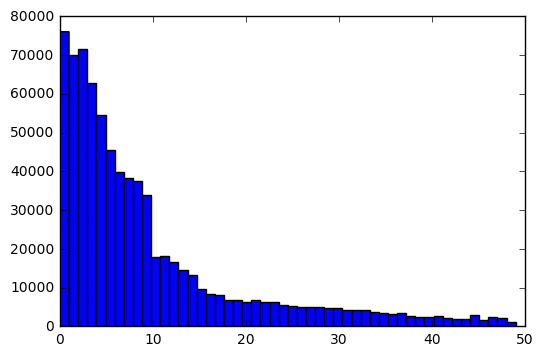

In [183]:
plt.hist([tag_to_class[str(g.tag).split(' ')[0]] for g in gramems], bins=50)